In [24]:
from nilm_analyzer.loaders import UKDALE_Loader
from matplotlib import pyplot as plt
import pandas as pd

In [25]:
ukdale_data = UKDALE_Loader(data_path=r'C:\Users\44749\NILM\nilm_analyzer_EM401\UKDALE')

Fetching the meter_appliance mapping from UKDALE metadata: C:\Users\44749\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\nilm_analyzer\metadata\ukdale

Loading specified buildings: [1, 2, 3, 4, 5]
Dataset successfully loaded!


In [26]:
appliance_data = ukdale_data.get_appliance_data(appliance='dishwasher', houses=[5])

Loading data for appliance DISHWASHER ...
Fetching DISHWASHER data for House 5


In [27]:
appliance_data.resample(sampling_period= 6)

Resampling for house number:  5
sampling_period = 6s, window_limit = 30 samples, fill_value = 0.0

Updating data with resampled dataset...


In [28]:
appliance_data.data

{5:                      aggregate  dishwasher
 time                                      
 2014-06-29 16:23:48      768.0         0.0
 2014-06-29 16:23:54      770.0         0.0
 2014-06-29 16:24:00      777.0         0.0
 2014-06-29 16:24:06      772.0         0.0
 2014-06-29 16:24:12      770.0         0.0
 ...                        ...         ...
 2014-11-13 17:52:00      606.0         0.0
 2014-11-13 17:52:06      608.0         0.0
 2014-11-13 17:52:12      619.0         0.0
 2014-11-13 17:52:18      612.0         0.0
 2014-11-13 17:52:24      616.0         0.0
 
 [1973687 rows x 2 columns]}

In [29]:
appliance_data.get_activations(threshold_x=10.0, threshold_y=0.05)

Extracting activations for House 5
Consumption Threshold is set to = 0.05
Time Delay Threshold is set to = 10.0 minutes
Estimating active durations of: dishwasher
Updating activations with durations when appliance is active (above threshold).


In [30]:
table = appliance_data.activations[5].sort_values(by='activity_start', ascending=True)
print(table)

        activity_start        activity_end  duration_in_minutes
0  2014-06-30 19:24:06 2014-06-30 21:27:00                122.9
1  2014-07-03 09:04:06 2014-07-03 11:03:24                119.3
2  2014-07-06 12:47:12 2014-07-06 14:10:12                 83.0
3  2014-07-08 18:21:24 2014-07-08 20:21:18                119.9
4  2014-07-11 14:21:54 2014-07-11 16:19:42                117.8
5  2014-07-13 20:01:06 2014-07-13 21:26:24                 85.3
6  2014-07-19 13:41:00 2014-07-19 14:07:00                 26.0
7  2014-07-19 14:19:12 2014-07-19 14:50:30                 31.3
8  2014-07-19 15:17:36 2014-07-19 15:37:18                 19.7
9  2014-07-19 18:42:24 2014-07-19 19:22:48                 40.4
10 2014-07-19 19:35:18 2014-07-19 20:07:12                 31.9
11 2014-07-22 10:16:54 2014-07-22 10:47:30                 30.6
12 2014-07-22 11:25:54 2014-07-22 11:43:30                 17.6
13 2014-07-27 08:31:24 2014-07-27 08:50:36                 19.2
14 2014-07-27 09:18:54 2014-07-27 09:51:

In [31]:
#table.drop(table.index[810:-1], inplace = True)


In [32]:
#table.drop(table.index[-1], inplace = True)

In [33]:
#table.to_csv(r'C:\Users\44749\NILM\nilm_analyzer_EM401\Processed Data\DW Activations Useable\Activations\UK_h1_activations.csv')

<Axes: title={'center': 'Part Day Load Profile of a Dishwasher - UKDALE House 5 - 25/10/2014'}, xlabel='Time', ylabel='Power [W]'>

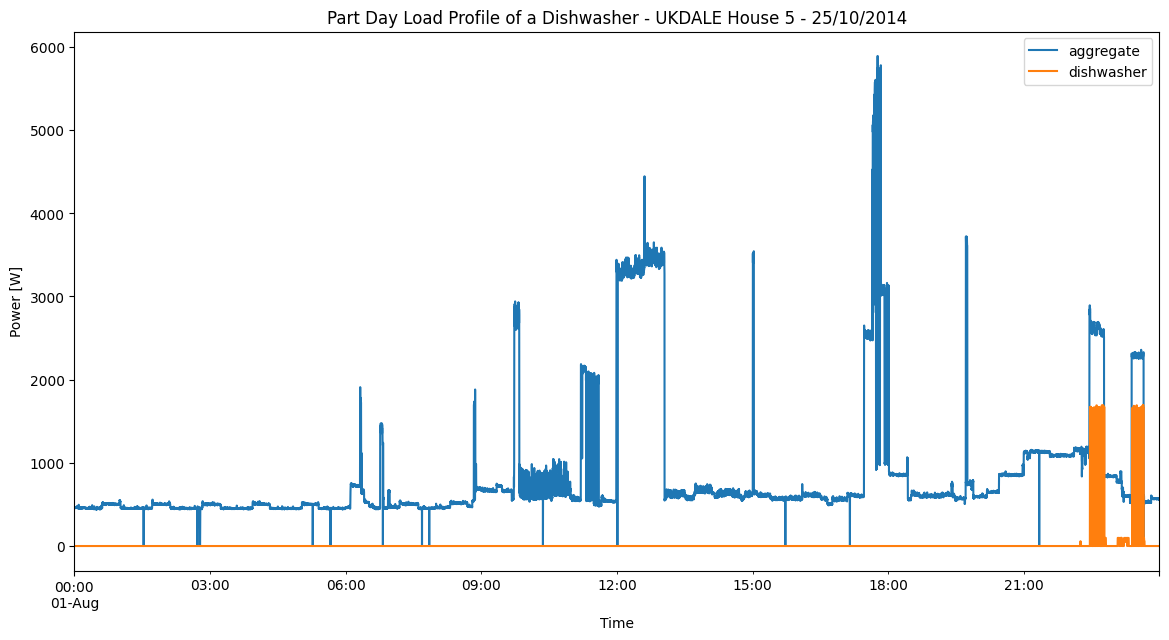

In [34]:
appliance_data.data[5].loc['2014-08-01 00:00:00':'2014-08-01 23:59:59'].plot(figsize=(14,7), xlabel= 'Time', ylabel=('Power [W]'), title=('Part Day Load Profile of a Dishwasher - UKDALE House 5 - 25/10/2014'))


In [35]:
appliance_data.subset_data(no_of_days=1)

Subetting dataset with 1 days of data for House 5
Updating data with selected active appliance activities...


In [36]:
a = appliance_data.data

In [37]:
#a.to_csv(r'C:\Users\44749\NILM\nilm_analyzer_EM401\Data Evaluation\test.csv', index=False)